In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
palette = sns.color_palette("Blues")


In [2]:
labels = pd.read_csv('../data/labels/boxes_v2.csv')

In [3]:
area = labels.width * labels.height

In [4]:
non_zero_area = area[area != 0]

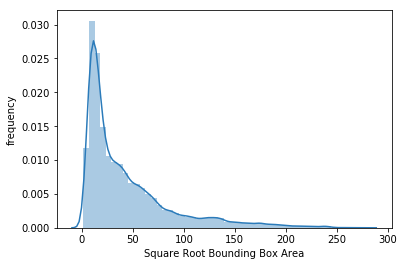

In [76]:
ax = sns.distplot(np.sqrt(non_zero_area), color=palette[4])
ax.set(xlabel='Square Root Bounding Box Area', ylabel='frequency')
plt.savefig('../figures/non_zero_sqrt_area.pdf', format='pdf')
plt.show()

In [26]:
all_image_widths_summed = labels.groupby('ImageId').sum()['width']
n_total = len(all_image_widths_summed)
n_zero = sum(all_image_widths_summed == 0)
print(n_zero, n_total, n_zero/n_total)

150000 192556 0.7789941627370739


In [28]:
ship_containing_rows = labels[labels.width != 0]

In [31]:
ships_per_image = ship_containing_rows.groupby('ImageId').count().width

In [52]:
counts = ships_per_image.value_counts()

In [54]:
counts

1     27104
2      7676
3      2953
4      1622
5       924
6       657
7       406
8       318
9       243
10      168
11      144
12      124
14       76
13       75
15       66
Name: width, dtype: int64

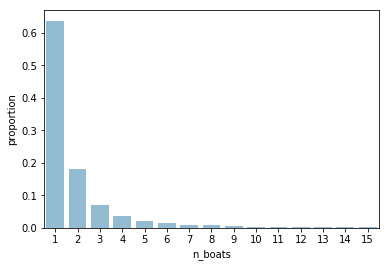

In [75]:

ax = sns.barplot(counts.index, counts/sum(counts), color=palette[2])
ax.set(xlabel='n_boats', ylabel='proportion')
plt.savefig('../figures/boats_per_image.pdf', format='pdf')
plt.show()